In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

url: https://ourworldindata.org/coronavirus-testing

In [2]:
raw_df = pd.read_csv("Project/owid-covid-data.csv", delimiter=",")
testing_df = pd.read_csv("Project/covid-19-testing-policy.csv", delimiter=",")
contact_df = pd.read_csv("Project/covid-contact-tracing.csv", delimiter=",")

In [3]:
# transform date format
raw_df['date'] = pd.to_datetime(raw_df['date'])
testing_df['Day'] = pd.to_datetime(testing_df['Day'])
contact_df['Day'] = pd.to_datetime(contact_df['Day'])

# select country
df = raw_df.loc[(raw_df["location"] == "Switzerland")].copy()
testing_df = testing_df.loc[(testing_df["Entity"] == "Switzerland")].copy()
contact_df = contact_df.loc[(contact_df["Entity"] == "Switzerland")].copy()

# merge testing and contact tracing df
policy_df = testing_df.copy()
policy_df["contact_tracing"] = contact_df["contact_tracing"]
# select time range
start_date = '2020-10-01'
end_date = '2021-02-28'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_timerange = df.loc[mask]

mask_p = (policy_df['Day'] > start_date) & (policy_df['Day'] <= end_date)
policy_timerange = policy_df.loc[mask_p]

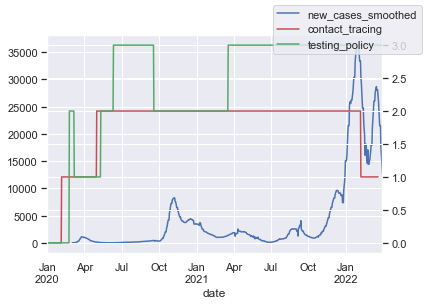

In [4]:
ax = df.plot(x="date", y="new_cases_smoothed", legend=False)
ax2 = ax.twinx()
policy_df.plot(x="Day", y=["contact_tracing", "testing_policy"], ax=ax2, legend=False, color=["r", "g"])
ax.figure.legend()
plt.show()

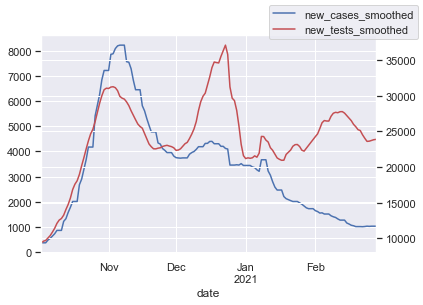

In [5]:
ax = df_timerange.plot(x="date", y="new_cases_smoothed", legend=False)
ax2 = ax.twinx()
df_timerange.plot(x="date", y="new_tests_smoothed", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()